# Exercise 18

## Analyze class homeworks


In [59]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

In [60]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import string
import nltk

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
Sexo    42 non-null object
T1      41 non-null object
T2      30 non-null object
T3      30 non-null object
T4      36 non-null object
T5      35 non-null object
T6      29 non-null object
dtypes: object(7)
memory usage: 2.4+ KB


0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

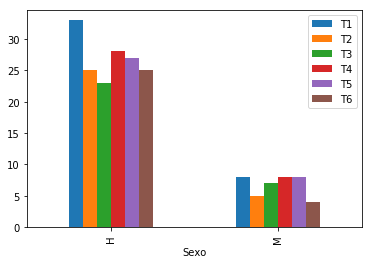

In [62]:
a=pd.pivot_table(data,index=["Sexo"],aggfunc='count')
pd.Series(a.plot(kind = "bar"))

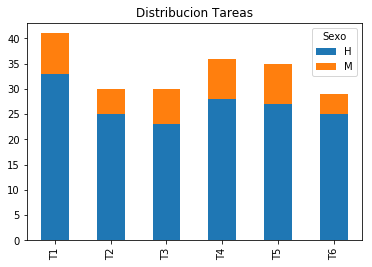

In [63]:
a=a.transpose()
a.plot(kind='bar',stacked=True,title="Distribucion Tareas")

In [64]:
b=data.isnull().sum()
b=pd.DataFrame(b)
b=b[1:7]

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

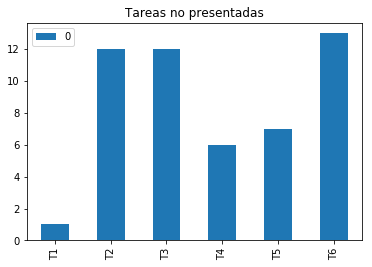

In [65]:
pd.Series(b.plot(kind = "bar",title="Tareas no presentadas"))

In [66]:
data1=data.fillna("")
data2=data.fillna("")
data3=data.fillna("")
data4=data.fillna("")

In [67]:
tareas=["T1","T2","T3","T4","T5","T6"]
for tarea in tareas:
    data1[tarea]=data1[tarea].apply(lambda x: len(x) - x.count(" "))

In [68]:
data1["Promedio_Palabras"]=(data1["T1"]+data1["T2"]+data1["T3"]+data1["T4"]+data1["T5"]+data1["T6"])/6
print("Palabras promedio")
data1

Palabras promedio


,Sexo,T1,T2,T3,T4,T5,T6,Promedio_Palabras
0,H,1891,0,3141,0,2708,1991,1621.833333
1,H,1282,1493,0,1490,1426,1503,1199.000000
2,H,1736,1679,1693,1537,1206,1485,1556.000000
3,M,1571,1528,1700,1245,2078,0,1353.666667
4,H,1591,1574,1239,1321,1442,1409,1429.333333
5,H,1838,0,1734,2123,0,969,1110.666667
6,H,1623,1703,1251,0,2250,0,1137.833333
7,M,3708,2351,867,2308,1528,0,1793.666667
8,H,1491,1414,1202,1242,732,1040,1186.833333
9,H,1622,1637,1576,1715,1579,1764,1648.833333


In [69]:
c=pd.pivot_table(data1,index=["Sexo"],margins=True)
c

,Promedio_Palabras,T1,T2,T3,T4,T5,T6
Sexo,,,,,,,
H,1377.362745,1506.382353,1223.764706,1118.323529,1564.323529,1700.941176,1150.441176
M,1426.916667,1953.125000,1164.500000,1352.500000,1589.750000,1631.500000,870.125000
All,1386.801587,1591.476190,1212.476190,1162.928571,1569.166667,1687.714286,1097.047619


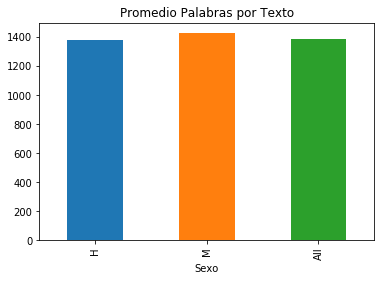

In [70]:
c=c["Promedio_Palabras"]
c.plot(kind='bar',stacked=True,title="Promedio Palabras por Texto")

En promedio las mujeres escriben mas palabras por texto que los hombres

In [71]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
#Contar puntuacion
def cuenta_puntuacion(texto):
    cuenta=sum([1 for char in texto if char in string.punctuation])
    return cuenta

In [73]:
tareas=["T1","T2","T3","T4","T5","T6"]
for tarea in tareas:
    data2[tarea]=data2[tarea].apply(lambda x: str(x))

In [74]:
tareas=["T1","T2","T3","T4","T5","T6"]
for tarea in tareas:
    data2[tarea]=data2[tarea].apply(lambda x: cuenta_puntuacion(x))

In [75]:
data2["Promedio_Puntuacion"]=(data2["T1"]+data2["T2"]+data2["T3"]+data2["T4"]+data2["T5"]+data2["T6"])/6
print("Puntuacion promedio")
data2

Puntuacion promedio


,Sexo,T1,T2,T3,T4,T5,T6,Promedio_Puntuacion
0,H,60,0,81,0,70,47,43.000000
1,H,11,26,0,13,36,20,17.666667
2,H,25,59,20,22,19,32,29.500000
3,M,19,39,30,28,45,0,26.833333
4,H,21,22,18,21,23,18,20.500000
5,H,46,0,64,47,0,21,29.666667
6,H,30,50,48,0,68,0,32.666667
7,M,82,51,27,37,28,0,37.500000
8,H,29,23,27,26,17,24,24.333333
9,H,37,16,33,28,28,21,27.166667


In [76]:
d=pd.pivot_table(data2,index=["Sexo"],margins=True)
d

,Promedio_Puntuacion,T1,T2,T3,T4,T5,T6
Sexo,,,,,,,
H,29.215686,28.176471,25.705882,28.352941,27.882353,42.617647,22.558824
M,30.520833,32.875000,25.625000,30.250000,32.625000,36.750000,25.000000
All,29.464286,29.071429,25.690476,28.714286,28.785714,41.500000,23.023810


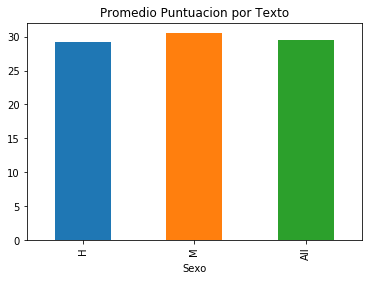

In [77]:
d=d["Promedio_Puntuacion"]
d.plot(kind='bar',stacked=True,title="Promedio Puntuacion por Texto")

En promedio las mujeres escriben con mas puntuacion por texto que los hombres

In [78]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [79]:
tareas=["T1","T2","T3","T4","T5","T6"]
for tarea in tareas:
    data3[tarea]=data3[tarea].apply(lambda x: str(x))

In [57]:
tareas=["T1","T2","T3","T4","T5","T6"]
for tarea in tareas:
    data3[tarea]=data3[tarea].apply(lambda x: len(sent_tokenize(x)))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  Searched in:
    - 'C:\\Users\\Sandra/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Sandra\\Anaconda3\\nltk_data'
    - 'C:\\Users\\Sandra\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Sandra\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Sandra\\AppData\\Roaming\\nltk_data'
    - ''
**********************************************************************


In [58]:
data3["Promedio_Frases"]=(data3["T1"]+data3["T2"]+data3["T3"]+data3["T4"]+data3["T5"]+data3["T6"])/6
print("Frases promedio")
data3

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [31]:
e=pd.pivot_table(data3,index=["Sexo"],margins=True)
e

DataError: No numeric types to aggregate

In [32]:
e=e["Promedio_Frases"]
e.plot(kind='bar',stacked=True,title="Promedio Frases por Texto")

NameError: name 'e' is not defined

En promedio las mujeres escriben con mas frases por texto que los hombres

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [26]:
data4["Texto"]=data4["T1"]+" "+data4["T2"]+" "+data4["T3"]+" "+data4["T4"]+" "+data4["T5"]+" "+data4["T6"]

In [27]:
!pip install textdistance

You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
import textdistance

In [29]:
print("Edit Based")
print("Hamming ",textdistance.hamming.similarity('house', 'mouse'))
print("MLIPNS ",textdistance.mlipns.similarity('house', 'mouse'))
print("Levenshtein ",textdistance.levenshtein.similarity('house', 'mouse'))

Edit Based
Hamming  4
MLIPNS  1
Levenshtein  4


In [30]:
print("Token Based")
print("Jaccard ",textdistance.jaccard.similarity('house', 'mouse'))
print("sorensen ",textdistance.sorensen.similarity('house', 'mouse'))
print("Overlap ",textdistance.overlap.similarity('house', 'mouse'))

Token Based
Jaccard  0.6666666666666666
sorensen  0.8
Overlap  0.8


In [31]:
print("Sequence Based")
print("longest common subsequence similarity ",textdistance.lcsseq.similarity('house', 'mouse'))
print("longest common substring similarity ",textdistance.lcsstr.similarity('house', 'mouse'))
print("Ratcliff-Obershelp similarity ",textdistance.ratcliff_obershelp.similarity('house', 'mouse'))

Sequence Based
longest common subsequence similarity  4
longest common substring similarity  4
Ratcliff-Obershelp similarity  0.8


In [32]:
X = data4["Texto"]
X.shape[0]

42

In [34]:
similarity = np.zeros((X.shape[0],X.shape[0]))
for j in range(len(X)):
    for i in range(len(X)):
        similarity[i,j] = textdistance.ratcliff_obershelp.similarity(X.iloc[i], X.iloc[j])

In [35]:
similaridades = pd.DataFrame(similarity)
similaridades

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.000000,0.039508,0.041083,0.053188,0.016586,0.097341,0.080228,0.057765,0.080124,0.075064,...,0.061568,0.073626,0.076620,0.087675,0.102713,0.054091,0.042566,0.066752,0.042856,0.055057
1,0.048166,1.000000,0.052280,0.040201,0.088254,0.090272,0.067437,0.048029,0.088441,0.088663,...,0.071992,0.094411,0.080933,0.068985,0.048103,0.076103,0.039783,0.075102,0.022579,0.091930
2,0.037468,0.064000,1.000000,0.051503,0.080551,0.107124,0.070532,0.050109,0.089209,0.091219,...,0.111038,0.059050,0.044758,0.109187,0.064052,0.093122,0.029658,0.086220,0.070013,0.047336
3,0.081530,0.049036,0.051406,1.000000,0.054242,0.044483,0.084950,0.087688,0.074767,0.092450,...,0.063513,0.044224,0.037466,0.048469,0.036845,0.098328,0.004172,0.053426,0.050195,0.045122
4,0.042245,0.095395,0.095443,0.037203,1.000000,0.087517,0.030650,0.053462,0.089359,0.061344,...,0.112286,0.093359,0.059466,0.084741,0.038133,0.043892,0.043999,0.032591,0.035268,0.054175
5,0.091899,0.071633,0.057456,0.071812,0.033618,1.000000,0.085434,0.042885,0.137741,0.066328,...,0.072832,0.077745,0.082378,0.062602,0.050588,0.115526,0.043492,0.077199,0.058932,0.062132
6,0.070873,0.037452,0.076262,0.049432,0.046684,0.094065,1.000000,0.052851,0.071882,0.061357,...,0.072706,0.052708,0.045015,0.067456,0.072577,0.055898,0.056687,0.070251,0.018666,0.058181
7,0.098439,0.057803,0.060416,0.049571,0.030339,0.039400,0.023596,1.000000,0.065863,0.088818,...,0.044583,0.042666,0.075445,0.085691,0.042495,0.063942,0.034373,0.063650,0.059722,0.074966
8,0.066953,0.081258,0.069385,0.052393,0.089359,0.099731,0.064754,0.067841,1.000000,0.077524,...,0.103786,0.035608,0.055364,0.086376,0.077753,0.094432,0.033128,0.077947,0.038341,0.057723
9,0.089717,0.064993,0.069092,0.084395,0.044077,0.055646,0.073346,0.091510,0.092653,1.000000,...,0.098364,0.052730,0.097559,0.090727,0.090618,0.128186,0.041070,0.107895,0.061128,0.116010


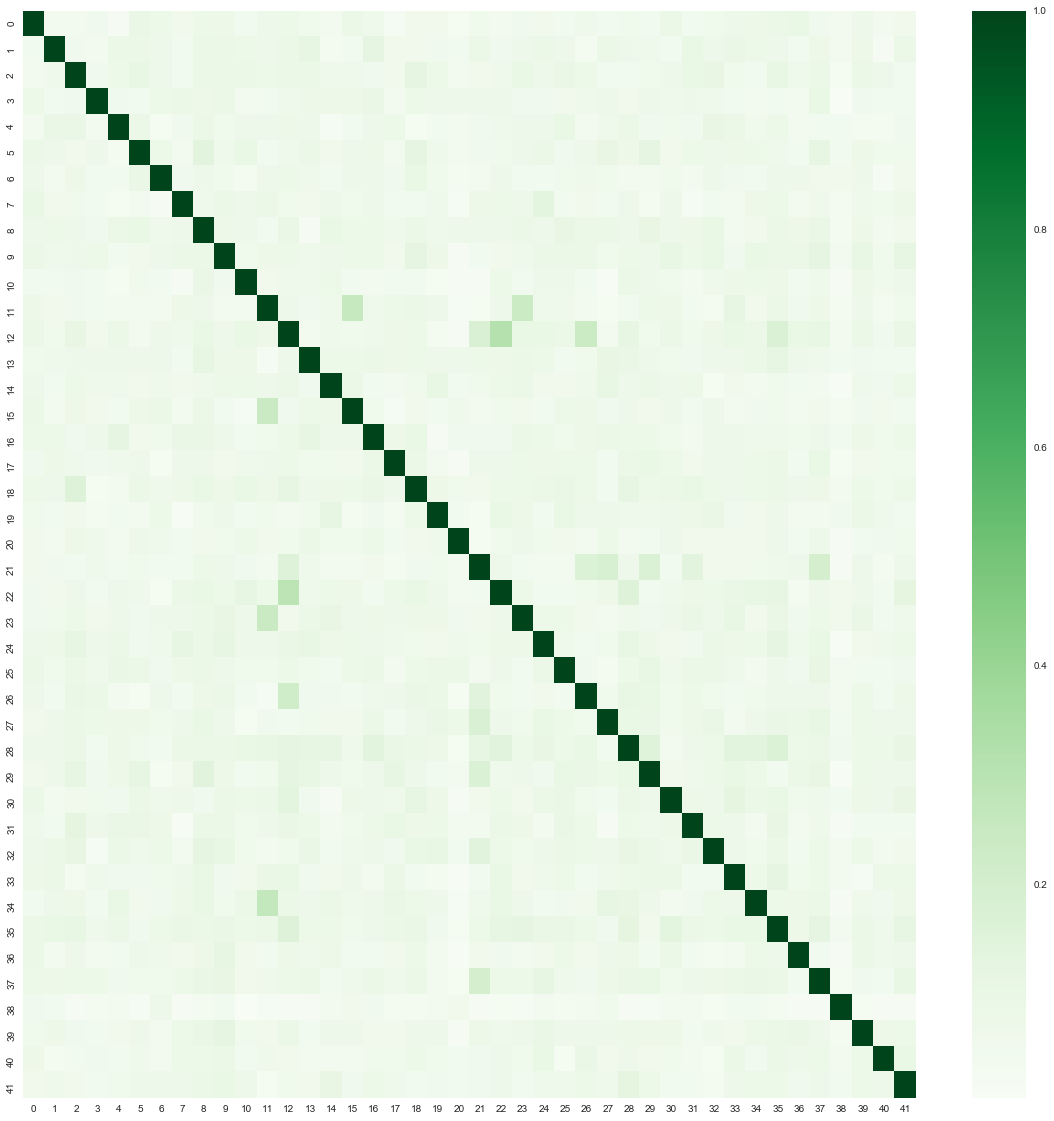

In [36]:
import seaborn as sns; sns.set()
plt.figure(figsize=(20, 20))
ax = sns.heatmap(similaridades,cmap="Greens")

In [37]:
distancias = np.zeros((X.shape[0],X.shape[0]))
for j in range(len(X)):
    for i in range(len(X)):
        distancias[i,j] = textdistance.ratcliff_obershelp.distance(X.iloc[i], X.iloc[j])

In [38]:
distancias = pd.DataFrame(distancias)
distancias

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.000000,0.960492,0.958917,0.946812,0.983414,0.902659,0.919772,0.942235,0.919876,0.924936,...,0.938432,0.926374,0.923380,0.912325,0.897287,0.945909,0.957434,0.933248,0.957144,0.944943
1,0.951834,0.000000,0.947720,0.959799,0.911746,0.909728,0.932563,0.951971,0.911559,0.911337,...,0.928008,0.905589,0.919067,0.931015,0.951897,0.923897,0.960217,0.924898,0.977421,0.908070
2,0.962532,0.936000,0.000000,0.948497,0.919449,0.892876,0.929468,0.949891,0.910791,0.908781,...,0.888962,0.940950,0.955242,0.890813,0.935948,0.906878,0.970342,0.913780,0.929987,0.952664
3,0.918470,0.950964,0.948594,0.000000,0.945758,0.955517,0.915050,0.912312,0.925233,0.907550,...,0.936487,0.955776,0.962534,0.951531,0.963155,0.901672,0.995828,0.946574,0.949805,0.954878
4,0.957755,0.904605,0.904557,0.962797,0.000000,0.912483,0.969350,0.946538,0.910641,0.938656,...,0.887714,0.906641,0.940534,0.915259,0.961867,0.956108,0.956001,0.967409,0.964732,0.945825
5,0.908101,0.928367,0.942544,0.928188,0.966382,0.000000,0.914566,0.957115,0.862259,0.933672,...,0.927168,0.922255,0.917622,0.937398,0.949412,0.884474,0.956508,0.922801,0.941068,0.937868
6,0.929127,0.962548,0.923738,0.950568,0.953316,0.905935,0.000000,0.947149,0.928118,0.938643,...,0.927294,0.947292,0.954985,0.932544,0.927423,0.944102,0.943313,0.929749,0.981334,0.941819
7,0.901561,0.942197,0.939584,0.950429,0.969661,0.960600,0.976404,0.000000,0.934137,0.911182,...,0.955417,0.957334,0.924555,0.914309,0.957505,0.936058,0.965627,0.936350,0.940278,0.925034
8,0.933047,0.918742,0.930615,0.947607,0.910641,0.900269,0.935246,0.932159,0.000000,0.922476,...,0.896214,0.964392,0.944636,0.913624,0.922247,0.905568,0.966872,0.922053,0.961659,0.942277
9,0.910283,0.935007,0.930908,0.915605,0.955923,0.944354,0.926654,0.908490,0.907347,0.000000,...,0.901636,0.947270,0.902441,0.909273,0.909382,0.871814,0.958930,0.892105,0.938872,0.883990


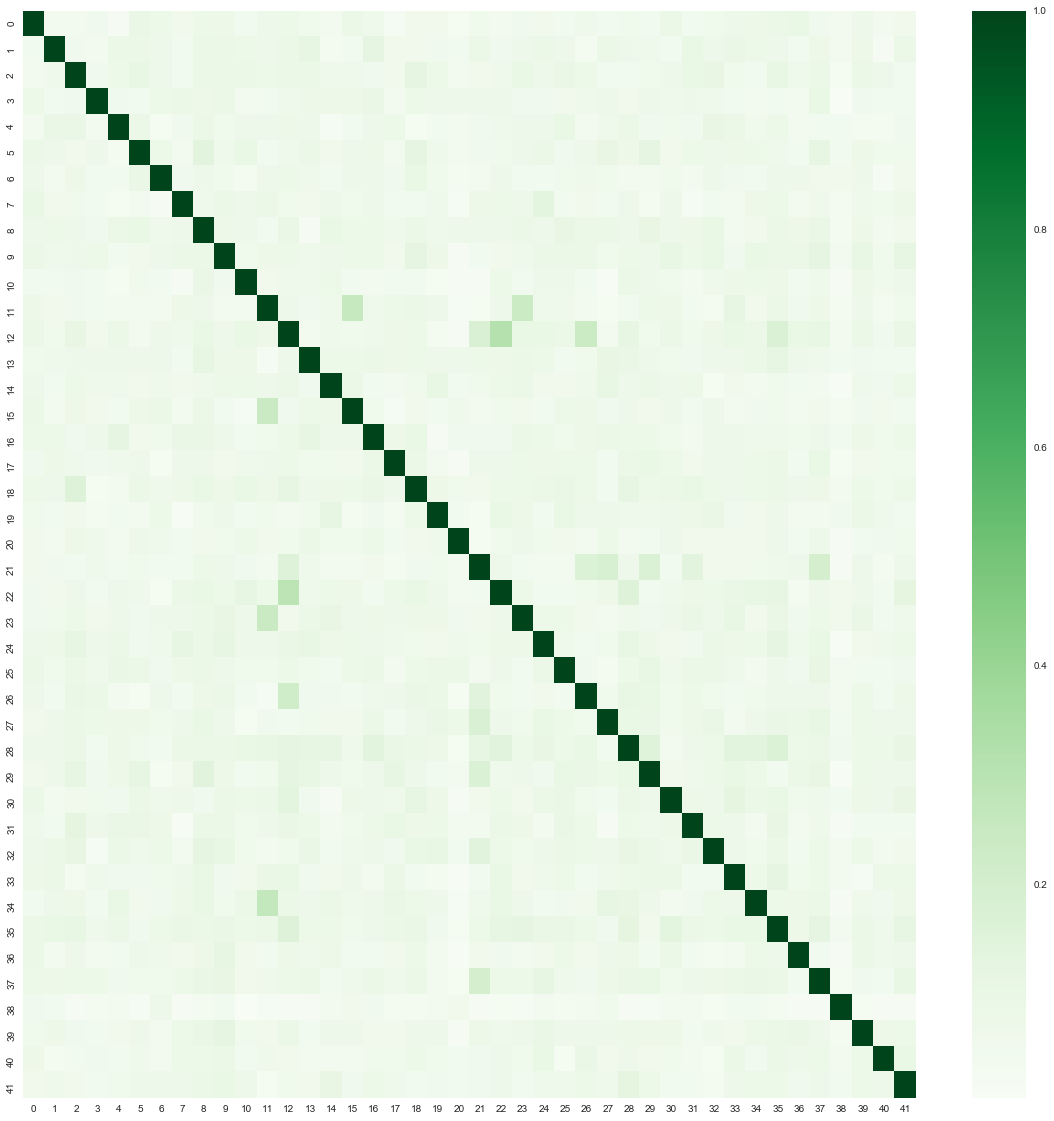

In [39]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(similaridades,cmap="Greens")

# Exercise 18.3

Create a classifier to predict the sex of each student



In [40]:
vect1 = TfidfVectorizer()
X_dtm = vect1.fit_transform(X)
y=data4["Sexo"]

In [41]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(n_jobs=-1,n_estimators=300, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
y_pred = clf.predict(X_test)

In [43]:
metrics.accuracy_score(y_test,y_pred)

0.9285714285714286

In [44]:
y_pred

array(['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H'], dtype=object)

unir textos en 1 sola vRIABLE
smoote
signos de admiracion, puntuacion
adjetivos
cantidad de puntos
oversampling
tildes, puntos
ingles, texto tener cuidado